### Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Import library and CMIP historical experiment

In [ ]:
import numpy as np
import pandas as pd

# change to the file path
path = "drive/MyDrive/intermediate/Climate/precipitation/historical/precipitation_historical_all.csv"
df = pd.read_csv(path)

#### Unit Conversion for precipitation

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['pr'] *= df['time'].dt.days_in_month * 86400

In [ ]:
df['time'] = df['time'].dt.date
df.head()

,time,pr,NAME_2,model
0,1981-01-16,190.535269,Alameda,cams_csm1_0
1,1981-02-15,60.926429,Alameda,cams_csm1_0
2,1981-03-16,29.131339,Alameda,cams_csm1_0
3,1981-04-16,4.076479,Alameda,cams_csm1_0
4,1981-05-16,85.555649,Alameda,cams_csm1_0


### Data Exploratory Analysis at Alameda

In [ ]:
a = df[df.NAME_2 == "Alameda"]
a_avg = a.groupby("time").mean()

Text(0, 0.5, 'mm per month')

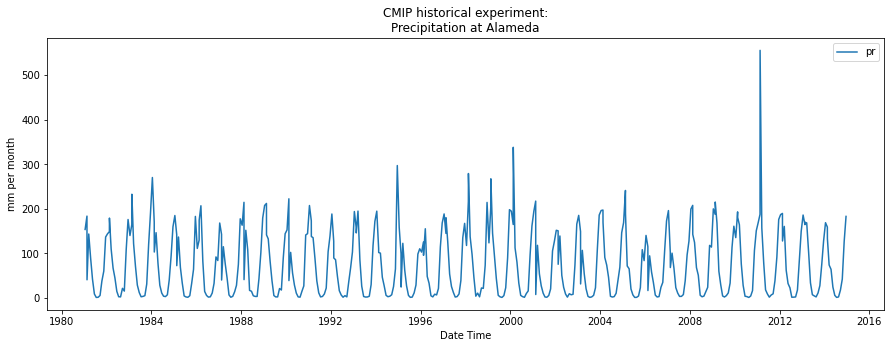

In [ ]:
import matplotlib.pyplot as plt

a_avg.plot(figsize=(15,5))
plt.title("CMIP historical experiment:\nPrecipitation at Alameda")
plt.xlabel("Date Time")
plt.ylabel("mm per month")

In [ ]:
a_avg

,pr
time,
1981-01-16,153.862777
1981-02-15,183.758267
1981-02-16,40.795896
1981-03-16,143.541892
1981-04-16,88.943690
...,...
2014-08-16,2.310161
2014-09-16,17.752300
2014-10-16,42.366838


### Seasonal Analysis

In [ ]:
a_avg.index = pd.to_datetime(a_avg.index)

In [ ]:
a_avg = a_avg.assign(month=a_avg.index.month)
a_avg = a_avg.assign(year=a_avg.index.year)

a_avg = a_avg.assign(time=a_avg.index.values)
a_avg.reset_index(drop=True, inplace=True)

In [ ]:
a_avg.head()

,pr,month,year
time,,,
1981-01-16,153.862777,1,1981
1981-02-15,183.758267,2,1981
1981-02-16,40.795896,2,1981
1981-03-16,143.541892,3,1981
1981-04-16,88.943690,4,1981


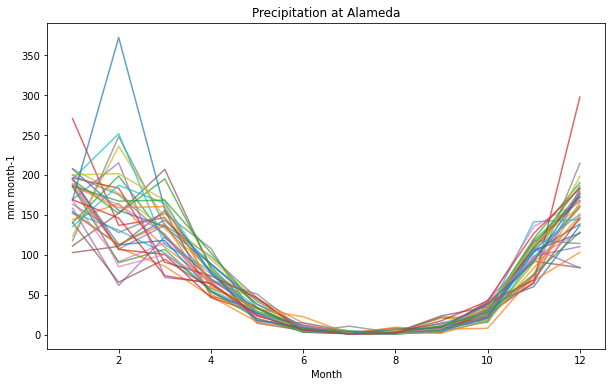

In [ ]:
years = np.linspace(1981,2014,2014-1981+1)
fig = plt.figure(figsize=(10,6))

for i, year in enumerate(years):
  plot_df = a_avg[(a_avg.year == year)].sort_values(by=['month']).groupby("month").mean()
  plot_df.pr.plot(alpha=.7)

  plt.title("Precipitation at Alameda")
  plt.xlabel("Month")
  plt.ylabel("mm month-1")

### Seasonal Analysis for all counties

In [ ]:
county_list = np.unique(df.NAME_2.values)
county_list

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

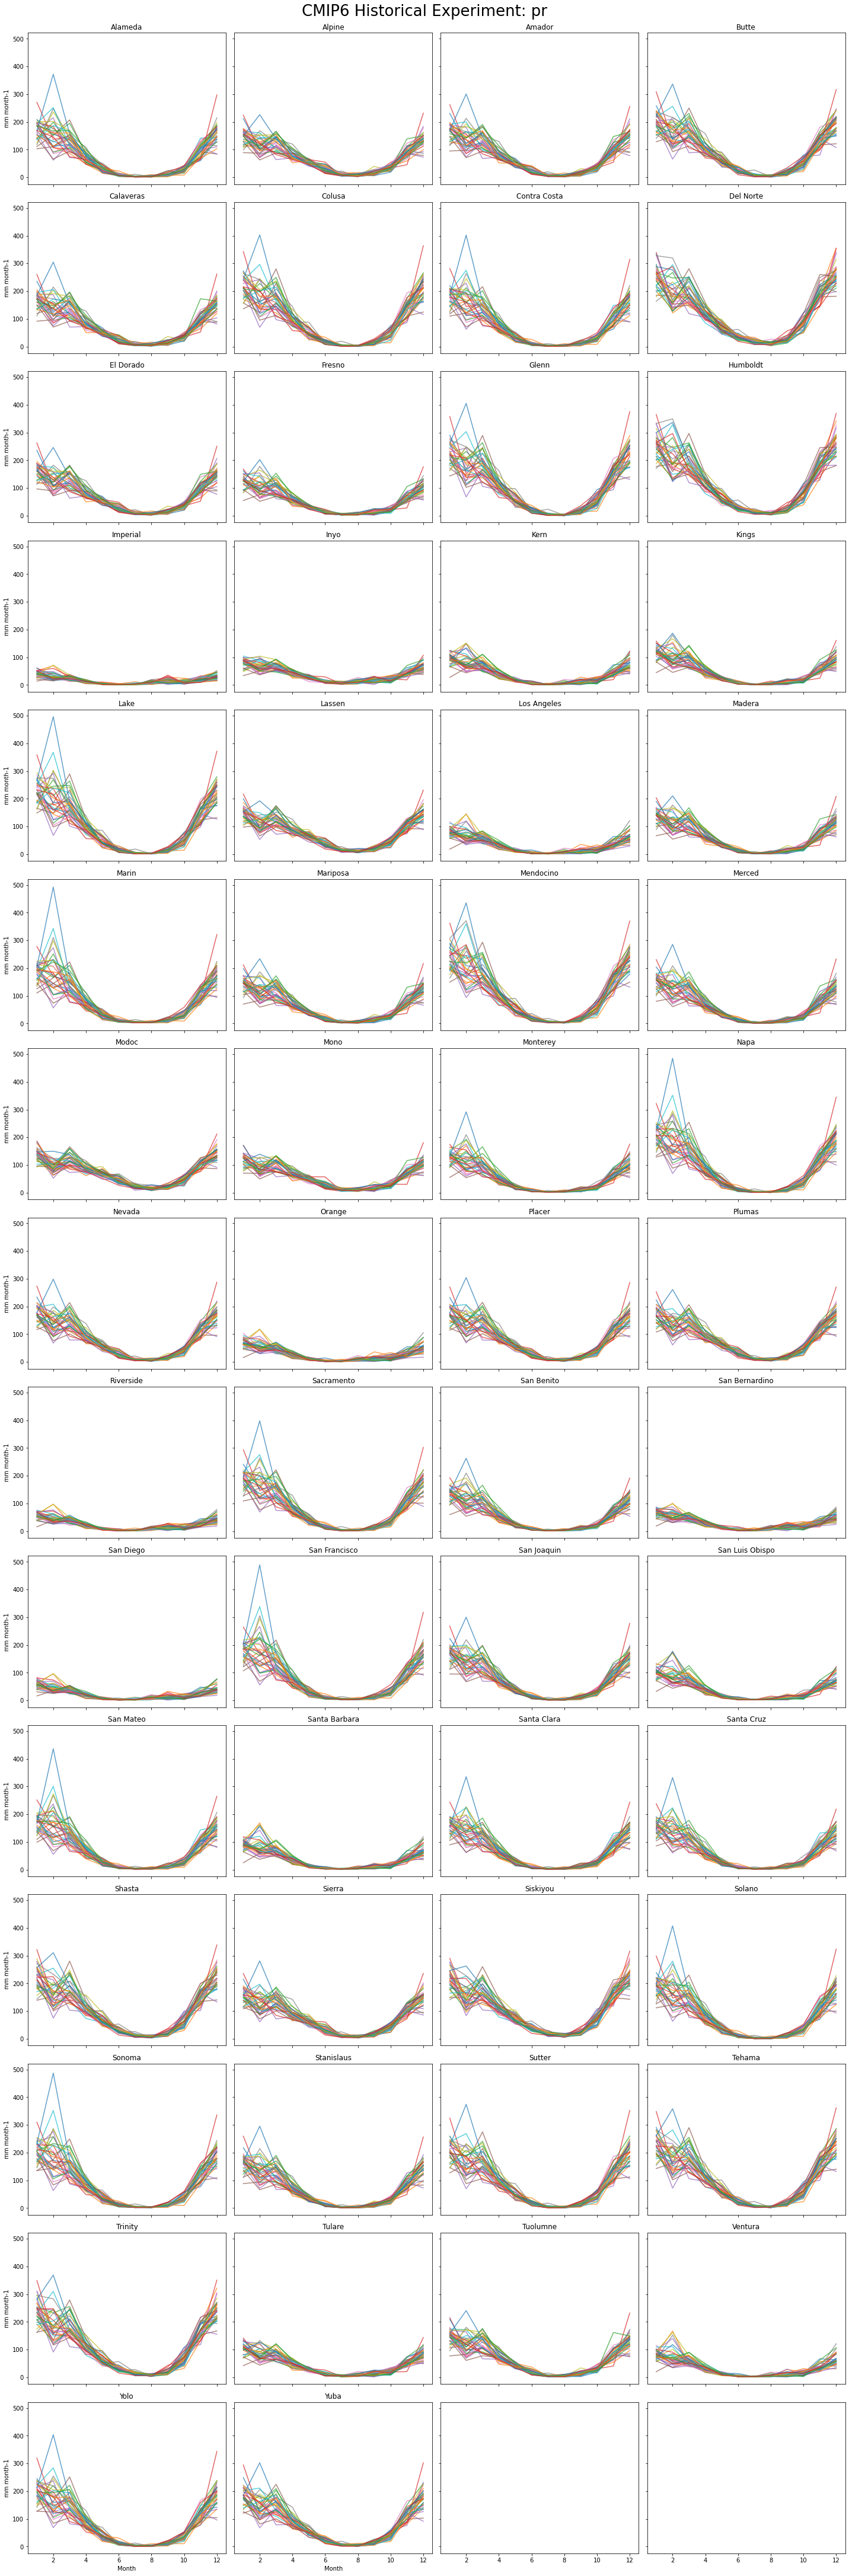

In [ ]:
fig, axes = plt.subplots(15,4, figsize=(20,60), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
  if i < len(county_list):
    county = county_list[i]
    for i, year in enumerate(years):
      a = df[df.NAME_2 == county]
      a_avg = a.groupby("time").mean()
      a_avg.index = pd.to_datetime(a_avg.index)
      a_avg = a_avg.assign(month=a_avg.index.month).assign(year=a_avg.index.year).assign(time=a_avg.index.values)
      a_avg.reset_index(drop=True, inplace=True)
      plot_df = a_avg[(a_avg.year == year)].sort_values(by=['month']).groupby("month").mean()
      plot_df.pr.plot(ax=ax, alpha=.7)
      ax.set_title(county)
      ax.set_xlabel("Month")
      ax.set_ylabel("mm month-1")

  else:
    break

plt.suptitle("CMIP6 Historical Experiment: pr", fontsize=26, y=1.005)
plt.tight_layout()
plt.show()

### Data Visualization: Cumulative Distribution Function (CDF)

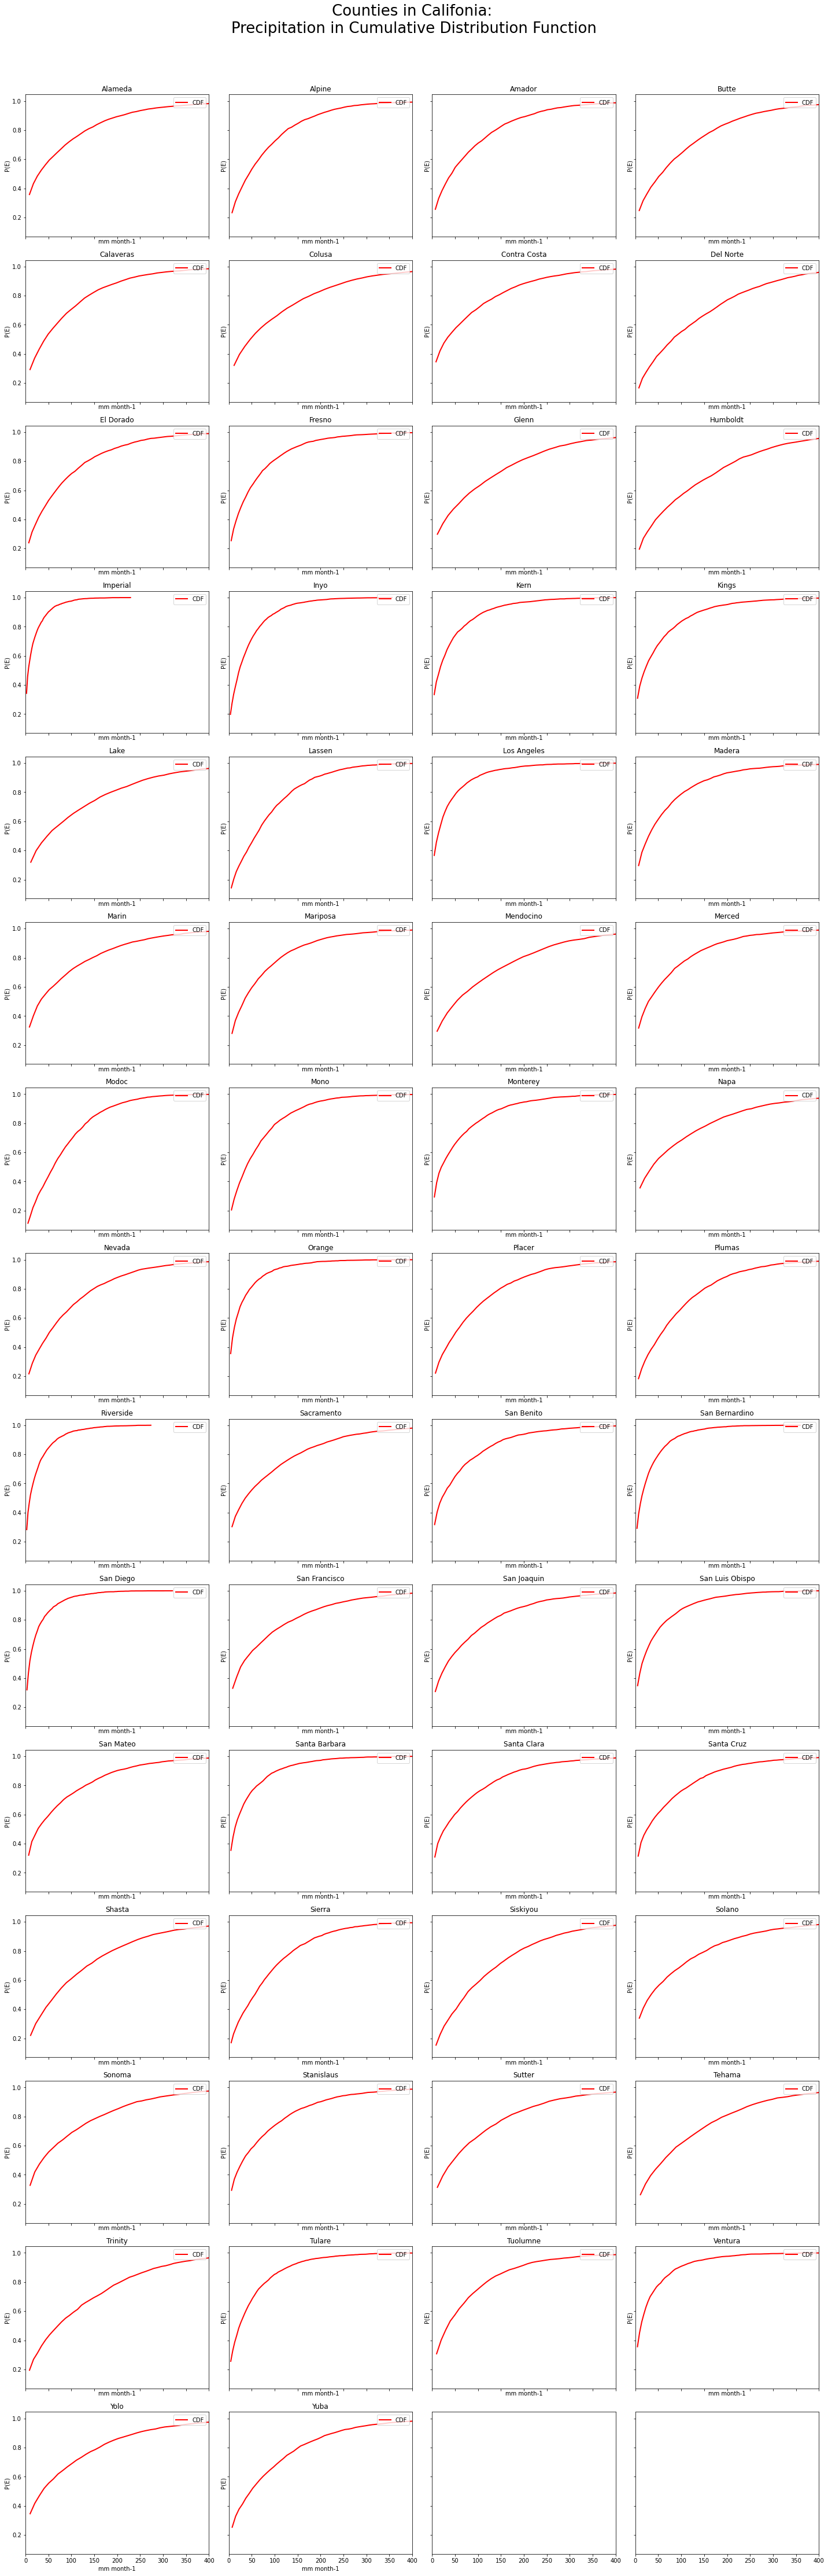

In [ ]:
fig, axes = plt.subplots(15,4, figsize=(20,60), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
  if i < len(county_list):
    county = county_list[i]
    # getting data of the histogram
    sub_df = df[df.NAME_2 == county]
    count, bins_count = np.histogram(sub_df.pr.values, bins=100)
      
    # finding the PDF of the histogram using count values
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax.plot(bins_count[1:], cdf, label="CDF", color="r", linewidth=2)
    ax.legend(loc="upper right")
    ax.set_title(county)
    ax.set_xlabel("mm month-1")
    ax.set_ylabel("P(E)")
    ax.set_xlim(0, 400)
  else:
    break

plt.suptitle("Counties in Califonia: \nPrecipitation in Cumulative Distribution Function", fontsize=26, y=1.03)
plt.tight_layout()
plt.show()